In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random

In [4]:
Data_Bordeaux = pd.read_csv('bordeaux2019.csv')
Data= pd.read_csv("History.csv", ',' )
Dataforecast= pd.read_csv("forecast.csv", ',')
Data_A=Data[:260]
Data_B=Data[260:]
Data_A.DATE= pd.to_datetime(Data_A.DATE)
Data_B.DATE= pd.to_datetime(Data_B.DATE)
Data_Bordeaux.DATE= pd.to_datetime(Data_Bordeaux.DATE)
#df1=Data_A.set_index('DATE')
#df2=Data_B.set_index('DATE')
#df3=Data_Bordeaux.set_index('DATE')

C:\Users\perso\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [5]:
df12 = pd.merge(Data_A, Data_B, on='DATE', how='inner', suffixes=('A', 'B'))

In [6]:
df123 = pd.merge(df12, Data_Bordeaux , on='DATE', how='inner')

In [7]:
# on va chercher les valeurs de vente produit A et produit B en fonction des données meteo du forecast

In [8]:
df123.head()

,DATE,ITEMA,SALESA,ITEMB,SALESB,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,...,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2019-02-01,A,113,B,71,10,7,15,8,9,...,10,7,5,176,389,176,0,1,6.6,météo très défavorable
1,2019-03-01,A,143,B,54,15,12,14,11,14,...,15,10,11,353,176,122,0,1,5.5,météo défavorable
2,2019-04-01,A,145,B,48,18,14,13,10,18,...,18,9,14,116,119,353,0,1,7.7,météo défavorable
3,2019-05-01,A,167,B,37,21,17,10,11,21,...,23,10,17,116,116,116,0,1,12.3,météo favorable
4,2019-06-01,A,202,B,39,33,23,11,19,29,...,32,16,23,116,113,116,0,7,14.5,météo idéale


In [9]:
df123=df123.drop(['DATE','ITEMA','ITEMB', 'TEMPERATURE_MORNING_C','TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C', 'HEATINDEX_MAX_C', 'DEWPOINT_MAX_C',
       'WINDTEMP_MAX_C', 'WEATHER_CODE_MORNING', 'WEATHER_CODE_NOON',
       'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR',
       'OPINION'], axis=1)

In [10]:
df123.head()

,SALESA,SALESB,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT
0,113,71,10,7,15,27.6,96,8.625,991,73.625
1,143,54,15,12,14,1.2,83,9.125,1029,79.750
2,145,48,18,14,13,0.5,67,8.375,1015,67.375
3,167,37,21,17,10,0.1,66,10.000,1018,34.000
4,202,39,33,23,11,0.0,59,10.000,1022,0.875


In [11]:
#entrainement pour les ventes A en fonction du parametre WINDSPEED_MAX_KMH
#entrainement pour les ventes B en fonction des parametres MAX_TEMPERATURE_C, TEMPERATURE_EVENING_C, HEATINDEX_MAX_C

In [12]:
y= df123['SALESA']
X= df123.drop(['SALESA','SALESB'], axis =1)

In [13]:
# Splitting data for training and for testing

In [14]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.2 , random_state=42)

In [15]:
test_X.shape , train_X.shape, test_y.shape , train_y.shape

((52, 8), (208, 8), (52,), (208,))

In [16]:
# build model de regression linénaire 

In [17]:
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

In [18]:
#prediction = model.predict(test_X)

In [19]:
#calculer la performance du modèle en utilisant MSE

In [31]:
y_pred= model.predict(test_X)
print(y_pred)

[ 77.16557226 103.29449629  61.45086298  58.12108422 141.641888
  85.39749349  59.29572211  46.99855034  95.11462888  77.86027899
  86.49534122  66.68155189  63.72591842  66.31526061  96.71233625
 100.43884642 151.42032949 121.74938382 110.24886227  71.00458921
  63.70517783  63.49643377 120.28991495  76.18688473  67.6722076
  60.42548351  70.43072874  52.72256031  94.40092036 114.19509688
 172.76978007 128.94477689  48.22716979  74.09074599  93.33128652
  65.40433945  69.87204562  94.14809569  63.19110069  69.97410351
  73.74910748  56.42522549  56.803344    71.42835778  89.30508514
  88.8522836   59.57755925  79.36484435 130.28967405  38.40608682
  56.433704    91.62321453]


In [32]:
print(test_y)

30      77
181     37
223    140
185     37
211    174
258    101
173     36
142     32
9      114
177     46
24     144
213     46
77      42
204     47
190     90
206    109
242    101
6      202
220     97
104     48
114     66
119     40
19     145
201     59
179     46
46     121
75      46
45     177
154     34
15     143
236    187
228    177
144     33
33      59
196     45
101     57
212     50
10     115
113     43
96      48
92      53
150     39
25      72
158     41
18      91
237     79
139     36
68     199
97     171
167     29
90     176
205     78
Name: SALESA, dtype: int64


In [ ]:
#calculer la performance du model en calculant MSE

In [33]:
np.mean((test_y-y_pred)**2)

1829.4826129390713

In [21]:
pd.DataFrame({'Actual': test_y,
             'prediction': prediction,
             'Diff': (test_y-prediction)})

NameError: name 'prediction' is not defined

In [22]:
# build model de regression polynomiale

In [23]:
from sklearn.preprocessing import PolynomialFeatures 

In [24]:
poly = PolynomialFeatures(degree=2)

In [25]:
x_poly = poly.fit_transform(train_X)

In [26]:
poly.fit(x_poly, train_y)

PolynomialFeatures()

In [27]:
lin2=LinearRegression()

In [28]:
lin2.fit(x_poly, train_y)

LinearRegression()

In [29]:
prediction2 = lin2.predict(poly.fit_transform(test_X))

In [30]:
np.mean((prediction2-test_y)**2)

2174.682407785969

In [31]:
pd.DataFrame({'Actual': test_y,
             'prediction': prediction2,
             'Diff': (test_y-prediction2)})

,Actual,prediction,Diff
115,161,74.317777,86.682223
223,140,58.307321,81.692679
245,178,104.023936,73.976064
89,71,89.048192,-18.048192
56,59,66.446294,-7.446294
88,85,85.956398,-0.956398
122,59,71.800256,-12.800256
199,68,59.945348,8.054652
254,187,147.322080,39.677920
136,33,125.265548,-92.265548


In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
regressor = DecisionTreeRegressor(random_state=4)

In [34]:
regressor.fit(train_X, train_y)

DecisionTreeRegressor(random_state=4)

In [35]:
prediction3 = regressor.predict(test_X)

In [36]:
DecisionTreeRegressor(random_state=0)

DecisionTreeRegressor(random_state=0)

In [37]:
np.mean((prediction3-test_y)**2)

4122.384615384615

In [38]:
pd.DataFrame({'Actual': test_y,
             'prediction': prediction3,
             'Diff': (test_y-prediction3)})

,Actual,prediction,Diff
115,161,101.0,60.0
223,140,41.0,99.0
245,178,86.0,92.0
89,71,178.0,-107.0
56,59,76.0,-17.0
88,85,117.0,-32.0
122,59,56.0,3.0
199,68,53.0,15.0
254,187,174.0,13.0
136,33,117.0,-84.0


In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
regr =RandomForestRegressor(max_depth=10, random_state=0, n_estimators=100)

In [41]:
regr.fit(train_X, train_y)

RandomForestRegressor(max_depth=10, random_state=0)

In [42]:
prediction4 = regr.predict(test_X)

In [43]:
np.mean((prediction4-test_y)**2)

1840.000144379725

In [44]:
pd.DataFrame({'Actual': test_y,
             'prediction': prediction4,
             'Diff': (test_y-prediction4)})

,Actual,prediction,Diff
115,161,76.516947,84.483053
223,140,55.792238,84.207762
245,178,90.390483,87.609517
89,71,101.324863,-30.324863
56,59,75.451376,-16.451376
88,85,91.095212,-6.095212
122,59,83.620018,-24.620018
199,68,62.332898,5.667102
254,187,161.202000,25.798000
136,33,96.757733,-63.757733


In [45]:
regr2 =RandomForestRegressor(max_depth=50, random_state=0, n_estimators=100)

In [46]:
regr2.fit(train_X, train_y)

RandomForestRegressor(max_depth=50, random_state=0)

In [47]:
prediction5 = regr2.predict(test_X)

In [48]:
np.mean((prediction5-test_y)**2)

1834.9422769230769

In [49]:
pd.DataFrame({'Actual': test_y,
             'prediction': prediction5,
             'Diff': (test_y-prediction5)})

,Actual,prediction,Diff
115,161,75.49,85.51
223,140,56.38,83.62
245,178,92.69,85.31
89,71,103.95,-32.95
56,59,77.62,-18.62
88,85,91.68,-6.68
122,59,81.57,-22.57
199,68,64.94,3.06
254,187,163.04,23.96
136,33,96.04,-63.04


In [50]:
#from sklearn.metrics import f1_score, confusion_matrix, classification_report
#from sklearn.model_selection import learning_curve

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
#model = KNeighborsClassifier(n_neighbors=1)

#model.fit(train_X, train_y)
#print('Train score:', model.score(train_X, train_y))
#print('Test score:', model.score(test_X, test_y))

In [54]:
cross_val_score(KNeighborsClassifier(), train_X, train_y,
                cv=5, scoring='accuracy').mean()

C:\Users\perso\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.0047619047619047615

In [55]:
#model_selection.GridSearchCV A FAIIIRE

In [56]:
#sklearn.naive_bayes: Naive Bayes // Bernouilli Gaussien A FAIIIRE

In [57]:
#sklearn.pipeline: Pipeline A COMPRENDRE

In [58]:
#sklearn.preprocessing: Preprocessing and Normalization  A COMPRENDRE

In [83]:
N, train_score, val_score= learning_curve(model, train_X, train_y)

NameError: name 'learning_curve' is not defined

In [ ]:
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.legend()

In [ ]:
pd.DataFrame(model.feature_importances_,index= train_X.columns).plot

In [86]:
# créer la matrice de données
X = df123[df123.columns[3:]].values

# créer le vecteur d'étiquettes
y = df123['SALESA'].values

# créer un jeu d'entrainement et un jeu de test (30% des données)
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.3)
                                
# standardiser les données
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)                               

In [85]:
#regression lineaire / lasso / ridge/ support vector machine linéaire/ naive baye/Regression logistic

In [87]:
from sklearn import kernel_ridge
predicteur = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=0.01)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train_std, y_train)

# prédire sur le jeu de test
y_test_pred = predicteur.predict(X_test_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE: {:.2f}".format(rmse))


RMSE: 40.69


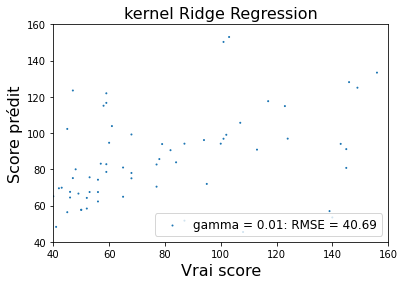

In [92]:
# créer une figure
fig = plt.figure()

# Compter, pour chaque paire de valeurs (y, y') où y est un vrai score et y' le score prédit,
# le nombre de ces paires.
# Ce nombre sera utilisé pour modifier la taille des marqueurs correspondants 
# dans un nuage de points
sizes = {}
for (yt, yp) in zip(list(y_test), list(y_test_pred)):
    if (yt, yp) in sizes.keys():
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1        
keys = sizes.keys()

# afficher les prédictions
plt.scatter([k[0] for k in keys], 
            [k[1] for k in keys], 
             s=[sizes[k] for k in keys], 
            label="gamma = 0.01: RMSE = {:.2f}".format(rmse))

# étiqueter les axes et le graphique
plt.xlabel('Vrai score', fontsize=16)
plt.ylabel(u'Score prédit', fontsize=16)
plt.title('kernel Ridge Regression', fontsize=16)

# limites des axes
plt.xlim([40, 160])
plt.ylim([40, 160])

# afficher la légende
plt.legend(loc="lower right", fontsize=12)

In [93]:
# valeurs du paramètre C
alpha_range = np.logspace(-2, 2, 5)

# valeurs du paramètre gamma
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}

# score pour sélectionner le modèle optimal
score = 'neg_mean_squared_error'

# initialiser la validation croisée
grid_pred = model_selection.GridSearchCV(
        kernel_ridge.KernelRidge(kernel='rbf'),
        param_grid,
        cv=5,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(X_train_std, y_train)

# prédire sur le jeu de test avec le modèle sélectionné 
y_test_pred_cv = grid_pred.predict(X_test_std)

# calculer la RMSE correspondante
rmse_cv = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_cv))


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [ ]:
lasso.fit(train_X,train_y)

In [ ]:
y_pred= lasso.predict(test_X)

In [ ]:
y_pred

In [ ]:
print("Slope: %.2f" % lasso.coef_[0])

In [ ]:
print("Intercept: %.2f" % lasso.intercept_)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y,y_pred)

In [ ]:
np.sqrt(mean_squared_error(test_y,y_pred))